# The Sparks Foundation
## Data Science and Business Analytics 

# Author: Harshit Raj
## Prediction using Unsupervised ML

### Task 2 : From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

In [29]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import datasets

In [30]:
# Load the iris dataset
iris_df = pd.read_csv("Iris.csv")

In [31]:
# See the first 5 rows
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [32]:
# See the last 5 rows
iris_df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [33]:
#Columns of the dataset
iris_df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [34]:
#getting the statistical overview of the dataset
iris_df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [35]:
#getting the datatype of columns
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [36]:
#checking the values of the dataset
iris_df.values

array([[1, 5.1, 3.5, 1.4, 0.2, 'Iris-setosa'],
       [2, 4.9, 3.0, 1.4, 0.2, 'Iris-setosa'],
       [3, 4.7, 3.2, 1.3, 0.2, 'Iris-setosa'],
       [4, 4.6, 3.1, 1.5, 0.2, 'Iris-setosa'],
       [5, 5.0, 3.6, 1.4, 0.2, 'Iris-setosa'],
       [6, 5.4, 3.9, 1.7, 0.4, 'Iris-setosa'],
       [7, 4.6, 3.4, 1.4, 0.3, 'Iris-setosa'],
       [8, 5.0, 3.4, 1.5, 0.2, 'Iris-setosa'],
       [9, 4.4, 2.9, 1.4, 0.2, 'Iris-setosa'],
       [10, 4.9, 3.1, 1.5, 0.1, 'Iris-setosa'],
       [11, 5.4, 3.7, 1.5, 0.2, 'Iris-setosa'],
       [12, 4.8, 3.4, 1.6, 0.2, 'Iris-setosa'],
       [13, 4.8, 3.0, 1.4, 0.1, 'Iris-setosa'],
       [14, 4.3, 3.0, 1.1, 0.1, 'Iris-setosa'],
       [15, 5.8, 4.0, 1.2, 0.2, 'Iris-setosa'],
       [16, 5.7, 4.4, 1.5, 0.4, 'Iris-setosa'],
       [17, 5.4, 3.9, 1.3, 0.4, 'Iris-setosa'],
       [18, 5.1, 3.5, 1.4, 0.3, 'Iris-setosa'],
       [19, 5.7, 3.8, 1.7, 0.3, 'Iris-setosa'],
       [20, 5.1, 3.8, 1.5, 0.3, 'Iris-setosa'],
       [21, 5.4, 3.4, 1.7, 0.2, 'Iris-setosa'],
 

In [37]:
#checking for missing values
iris_df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Finding the optimum number of clusters for k-means classification(main objective of the task)

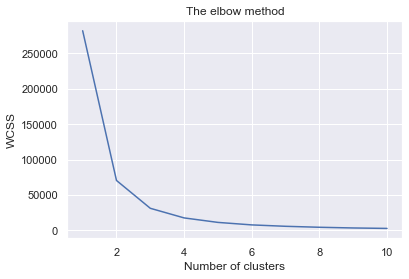

In [38]:
x = iris_df.iloc[:, [0, 1, 2, 3]].values
wcss = []  #Within cluster sum of squares

for i in range(1, 11):
    km = KMeans(n_clusters=i)
  
    km.fit(x)
    wcss.append(km.inertia_)
    
# Plotting the results onto a line graph, 



#THE ELBOW METHOD
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

In [39]:
# Applying Kmeans to the dataset / Creating the kmeans classifier


kmeans = KMeans(n_clusters = 3, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
#As you see there are 3 cluster I make in the n_clusters value.

y_kmeans = kmeans.fit_predict(x)


y_kmeans #or you can use kmeans.labels_ to label the data into 3 clusters as you see below output

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [40]:
#creating an another dataframe and adding an extra column which has the cluster number.

df = pd.DataFrame(x, columns = ['sl','sw','pl','pw'])

df['y_kmeans'] = y_kmeans

df.head(10)

,sl,sw,pl,pw,y_kmeans
0,1.0,5.1,3.5,1.4,1
1,2.0,4.9,3.0,1.4,1
2,3.0,4.7,3.2,1.3,1
3,4.0,4.6,3.1,1.5,1
4,5.0,5.0,3.6,1.4,1
5,6.0,5.4,3.9,1.7,1
6,7.0,4.6,3.4,1.4,1
7,8.0,5.0,3.4,1.5,1
8,9.0,4.4,2.9,1.4,1
9,10.0,4.9,3.1,1.5,1


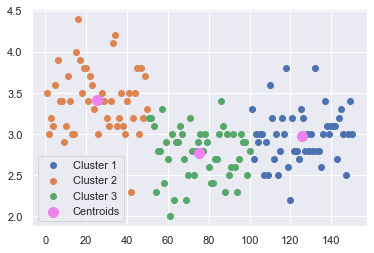

In [41]:
# Visualising the clusters - On the first and third columns

#Plotting the first cluster
plt.scatter(x[y_kmeans ==0,0], x[y_kmeans ==0,2], label = 'Cluster 1')

#Plotting the second cluster
plt.scatter(x[y_kmeans ==1,0], x[y_kmeans ==1,2], label = 'Cluster 2')

#Plotting the third cluster
plt.scatter(x[y_kmeans ==2,0], x[y_kmeans ==2,2], label = 'Cluster 3')


# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,2], 
            s = 100, c = 'violet', label = 'Centroids')

plt.legend()

In [42]:
df.head()#check the cluster value in y_means at the top 5 rows

,sl,sw,pl,pw,y_kmeans
0,1.0,5.1,3.5,1.4,1
1,2.0,4.9,3.0,1.4,1
2,3.0,4.7,3.2,1.3,1
3,4.0,4.6,3.1,1.5,1
4,5.0,5.0,3.6,1.4,1


In [43]:
df.tail()#check the cluster value in y_means at the bottom 5 rows

,sl,sw,pl,pw,y_kmeans
145,146.0,6.7,3.0,5.2,0
146,147.0,6.3,2.5,5.0,0
147,148.0,6.5,3.0,5.2,0
148,149.0,6.2,3.4,5.4,0
149,150.0,5.9,3.0,5.1,0


In [44]:
#predicting the cluster of my own data by Kmeans 
x = [5.9,3.0,5.1,1.8]
kmeans.predict([x])

array([1])